Felix Douven, Yosha op het Veld, Kasper Walraven

# Initialization

load all needed libraries and functions, 
check the previos tutorial how to correctly load keras and other modules

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import cv2
from tqdm import tqdm

importing the libraries used in the code.

# Load dataset & Plot a subset

load your dataset and show a plot of the subset of your data

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

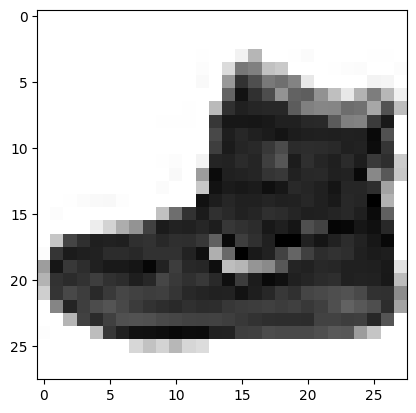

In [2]:
mnist = tf.keras.datasets.fashion_mnist  
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train[0])
categories = ["T-shirt_top", "trouser","pullover","dress","coat","sandal","shirt","sneaker","bag","ankle boot"]
print(y_train[0])
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show() 

importing the images as a matrix and plotting the not yet normalized data.

# Prepare Data

pre-process your raw input data... rescale... normalize....

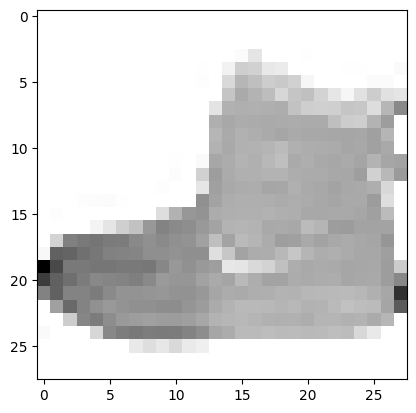

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00135942 0.    

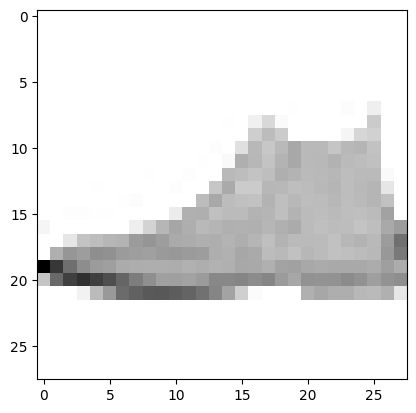

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [3]:
x_train = tf.keras.utils.normalize(x_train, axis=1) 

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()  
print(x_train[0])


x_test = tf.keras.utils.normalize(x_test, axis=1)  

plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()  
print(x_test[0])

all values scaled between 0 and 1. thus the highest value is scaled down to 1. this is why the images is a lighter color than before

## Define your Model

Define your neural network architecture here

* Describe the implemented network architecture.
* How many parameters does this network have, and where in the network are these located?

In [4]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(28, 28,1)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

the model has 11 layers, 9 of which are hidden. the input layer has 28*28*1=784 neurons. the output has 10 neurons, 1 for each class. the hidden layers consist of 3 convolution layers, each of them followed by a pooling layer. the output of these layers are run trough 2 fully connected layers of 128 neurons each.

# Fit the Model

Fitting the model is the time consuming part, this depend on the complexity of the model and the amount of training data.
In the fitting process the model is first build up in memory with all the tunable parameters and intercomnnects (with random start values). This is also the limitation of some systems, all these parameters are stored in memory (or when not fitting in a swap file)

**TIP:** do not start the first time with training a lot of epochs, first see if this and all following steps in your system work and when you are sure that all works train your final model. You can also monitor the Jetson CPU/GPU/Memory performance during this process (see Tips & Tricks)

* Explain what hyperparameters are available and what they do.
* Which hyperparameter result in better training results?

In [5]:
model.compile(optimizer='SGD',  
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100) 

Epoch 1/100
1875/1875 [==============================] - 9s 4ms/step - loss: 1.6481 - accuracy: 0.4501
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7679 - accuracy: 0.7010
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6466 - accuracy: 0.7495
Epoch 4/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5830 - accuracy: 0.7784
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5408 - accuracy: 0.7978
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5076 - accuracy: 0.8119
Epoch 7/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4792 - accuracy: 0.8222
Epoch 8/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4585 - accuracy: 0.8290
Epoch 9/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4390 - accuracy: 0.8385
Epoch 10/100
1875/1875 [==============================] - 8s 4ms/step - l

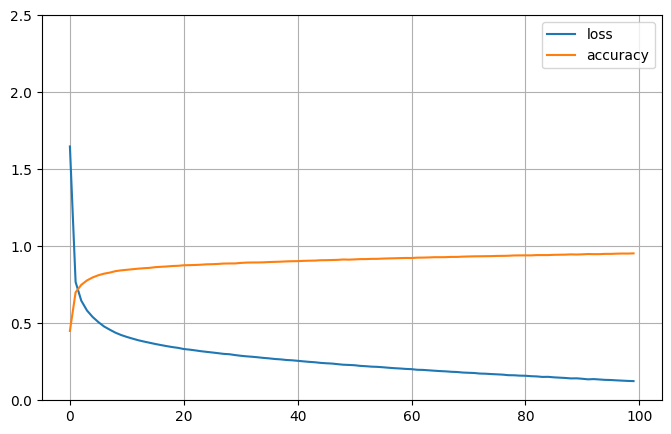

In [6]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2.5)
plt.show()

Here the optimiser is chosen and model is trained with 100 iterations.

# Evaluate Model

Show the model accuracy after the training process ...
* What is the final accuracy of the trained Network?

In [7]:
val_loss, val_acc = model.evaluate(x_test, y_test) 
print(val_loss)  
print(val_acc) 

313/313 [==============================] - 1s 3ms/step - loss: 0.4315 - accuracy: 0.8834
0.4314877986907959
0.883400022983551


Here the model is tested with the given test data. The accuracy is shown

# Save model

Save the model for later usage

In [8]:
model.save('Ass2A')
new_model = tf.keras.models.load_model('Ass2A')

INFO:tensorflow:Assets written to: Ass2A\assets


INFO:tensorflow:Assets written to: Ass2A\assets


# Evaluate Final Model

After training and saving the model you can deploy this model on any given input image. You can start a new application in where you import this model and apply it on any given imput images, so you can just load the model and don't need the timeconsuming training anymore.

313/313 [==============================] - 1s 2ms/step


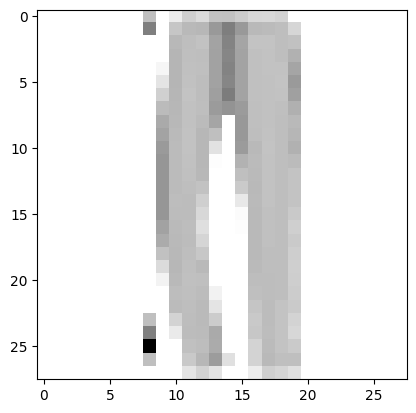

prediction = trouser


In [9]:
predictions = new_model.predict([x_test])

plt.imshow(x_test[2], cmap=plt.cm.binary)
plt.show()
print("prediction =", categories[np.argmax(predictions[2])])


Here we predict one image to double check the model. this image is out of the test data. The model classifies the image as trouser. as seen by the image this is correct.

## Make Prediction

We can use our saved model to make a prediction on new images that are not trained on... make sure the input images receive the same pre-processing as the images you trained on.

So fetch some images from the internet (similar classes, but not from your dataset), prepare them to fit your network and classify them. Do this for  **10 images per class** and show the results!

* How good is the detection on you real dataset? (show some statistics) 

100%|██████████| 10/10 [00:00<00:00, 2005.40it/s]


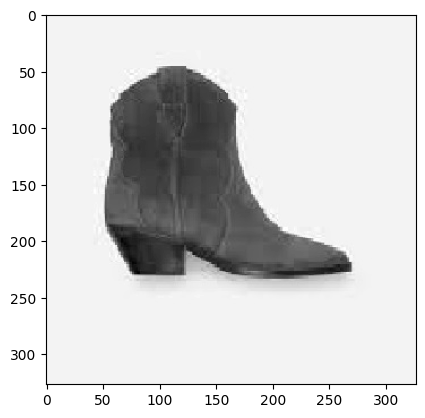

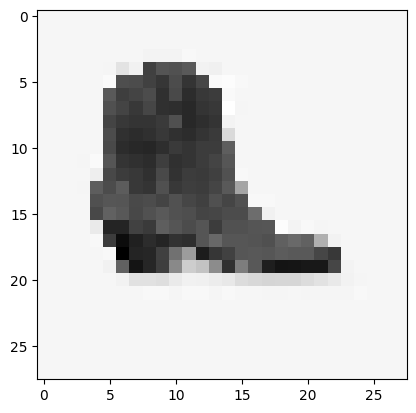

In [10]:
#yosha
#DATADIR = "C:/Users/yosha19/OneDrive - Office 365 Fontys/General/Ass2A/plaatjes"

#kasper
DATADIR = "C:/Users/mobie/OneDrive - Office 365 Fontys/General - AIS/Ass2A/plaatjes"

CATEGORIES = ["0. T-shirt_top", "1. trouser","2. pullover","3. dress","4. coat","5. sandal","6. shirt","7. sneaker","8. bag","9. ankle boot"]

IMG_SIZE = 28

test_data = []

def create_test_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                test_data.append([new_array, class_num]) 
                
            except Exception as e:  
                pass
                    
            
    plt.imshow(img_array, cmap='gray') 
    plt.show()      

    plt.imshow(new_array, cmap='gray')
    plt.show()  

create_test_data()


Here we import our own data set. An for loop iterates trough all images and resizes them and adds them to an array. The before and after pictures of the resize are shown.

x =  [[  0   0   0   0   0   0   0   0   0   0  55 247 149  31  54 141 133  43
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  58 230 233 229 246 249 229 232 249 239 230
  227 229  97   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 229 231 229 231 229 244 248 249 247 246 228 228
  227 227 227 236   0   0   0   0   0   0]
 [  0   0   0   0   0 237 231 231 229 229 230 228 244 246 244 222 228 227
  227 227 228 230 226   0   0   0   0   0]
 [  0   0   0   0   0 240 237 231 229 231 231 231 230 231 226 228 228 227
  227 228 225 232 229   0   0   0   0   0]
 [  0   0   0   0   0 236 239 235 231 231 231 231 231 229 231 229 228 228
  228 228 226 234 230  91   0   0   0   0]
 [  0   0   0   0 188 235 242 239 234 231 231 232 231 231 231 231 229 227
  228 232 232 233 230 230   0   0   0   0]
 [  0   0   0   0 234 237 241 243 236 233 233 232 232 233 233 231 231 229
  231 231 253 235 230 228   0   0   0   0]
 [  0   0   0   0 238 236 241 247 235 236 235 234 234 234 2

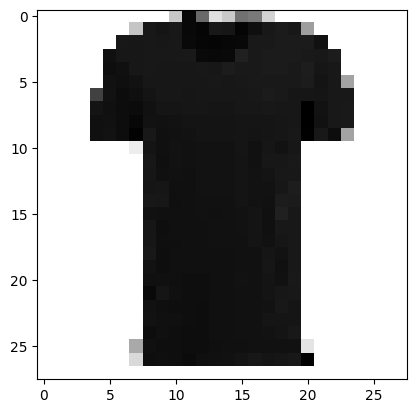

na norm [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.04568184 0.19987875
  0.12203431 0.02572315 0.04488147 0.11704603 0.1109159  0.03623168
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.08478083 0.19292559 0.19382206 0.19020255 0.19906953
  0.20393654 0.19001938 0.19282409 0.2066983  0.19931503 0.19379737
  0.19292227 0.19564676 0.13390984 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.34065502 0.33766157 0.19208679 0.19215836 0.19020255 0.19745107
  0.20311752 0.20661496 0.20529117 0.20420796 0.19014154 0.19211217
  0.19292227 0.19393806 0.31337663 0.35770471 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.37864063
  0.34363017 0.

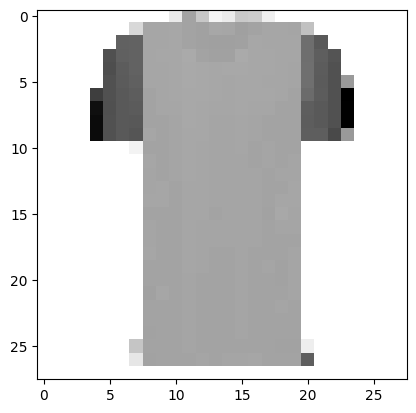

In [11]:
import numpy
X = []
Y = []
y = []
x_test = []

for features,label in test_data:
    X.append(features)
    Y.append(label)

for i in range(len(X)):
    for j in range(len(X[i])):
        for k in range(len(X[i][j])):
            t = X[i][j][k]
            t = 255-t
            if t <= 15:
                t = 0
            X[i][j][k] = t
            
print("x = ", X[0])
plt.imshow(X[0], cmap=plt.cm.binary)
plt.show()
    
X = tf.keras.utils.normalize(X, axis=1) 

print("na norm", X[0])
plt.imshow(X[0], cmap=plt.cm.binary)
plt.show()

Here we split the data into two lists; the pictures and the catagories. Afterward we invert all the colors of the images and remove the very light gray(almost white). This is to add contrast. After that the images are normalized this means all the  values are made between zero and one and the before and after is shown. 

0
1/1 [==============================] - 0s 116ms/step
[[9.8633516e-01 9.3488746e-09 2.5658829e-03 3.0601735e-03 1.4609611e-04
  2.8130142e-11 7.8925360e-03 3.3202521e-09 1.5230577e-07 4.6405957e-10]]


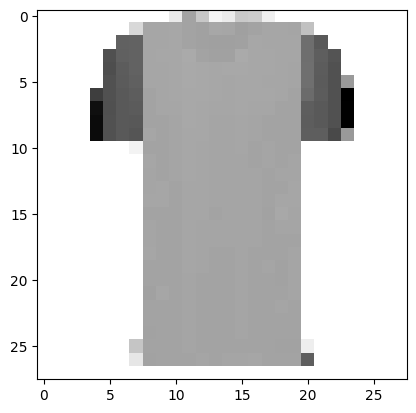

predict = 0. T-shirt_top
correct
0
1/1 [==============================] - 0s 19ms/step
[[9.5893610e-01 2.0195850e-05 2.3310822e-04 1.3851582e-04 1.9722397e-06
  7.0724222e-09 4.0660173e-02 7.9229476e-06 5.2974343e-07 1.3769738e-06]]


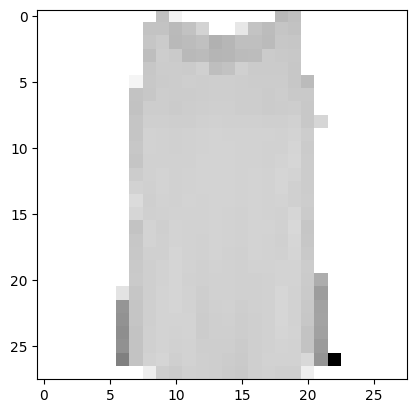

predict = 0. T-shirt_top
correct
0
1/1 [==============================] - 0s 19ms/step
[[9.8423135e-01 1.2561351e-09 4.2674989e-03 1.6037398e-04 3.8428283e-05
  3.2733418e-08 4.0963772e-03 7.1372483e-03 2.4314269e-05 4.4295899e-05]]


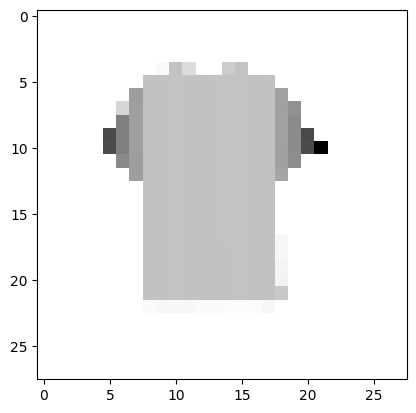

predict = 0. T-shirt_top
correct
0
1/1 [==============================] - 0s 21ms/step
[[9.9624795e-01 4.3182538e-07 1.5461742e-03 4.8039090e-07 4.0262737e-08
  1.3694382e-10 2.1077145e-03 1.0518821e-08 9.7197517e-05 5.4162541e-10]]


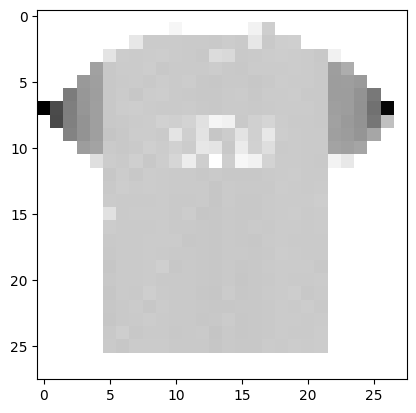

predict = 0. T-shirt_top
correct
0
1/1 [==============================] - 0s 20ms/step
[[9.3116266e-01 1.7852156e-10 2.5650648e-05 4.1743724e-09 5.1497118e-08
  7.2409323e-15 6.8811670e-02 1.9862352e-12 4.0333806e-13 3.7993070e-14]]


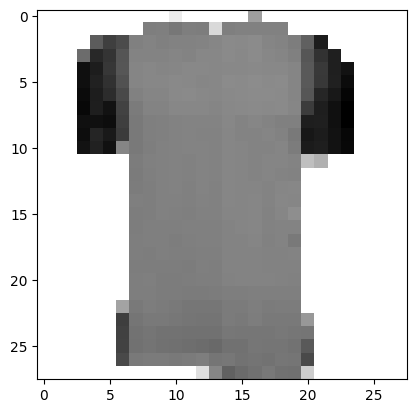

predict = 0. T-shirt_top
correct
0
1/1 [==============================] - 0s 22ms/step
[[7.3927166e-03 1.3951501e-01 1.2579086e-02 1.6665938e-07 7.3887515e-01
  1.7451670e-02 6.4153105e-02 5.1425456e-04 9.2894314e-03 1.0229363e-02]]


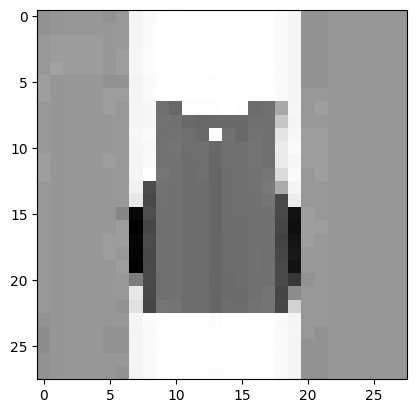

predict = 4. coat
wrong
0
1/1 [==============================] - 0s 21ms/step
[[9.7666991e-01 1.7318029e-05 4.3480027e-06 7.2096242e-04 2.3308573e-07
  6.5302789e-05 2.2514420e-02 1.8508729e-06 1.5336749e-07 5.4241864e-06]]


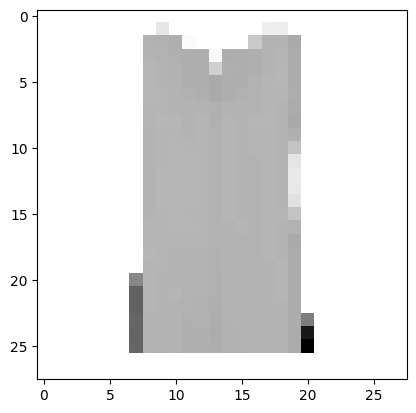

predict = 0. T-shirt_top
correct
0
1/1 [==============================] - 0s 21ms/step
[[1.0840127e-03 9.7663316e-04 2.0667821e-01 8.3472081e-02 1.9454323e-01
  2.9309571e-05 1.1522582e-01 8.8846660e-04 3.8666174e-01 1.0440544e-02]]


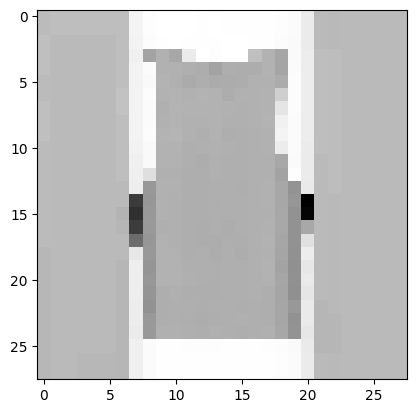

predict = 8. bag
wrong
0
1/1 [==============================] - 0s 23ms/step
[[4.3787831e-01 1.4363234e-03 1.2987697e-01 1.7593199e-02 2.8540060e-04
  1.6083173e-07 4.1283989e-01 1.0874666e-06 2.2631648e-05 6.6118904e-05]]


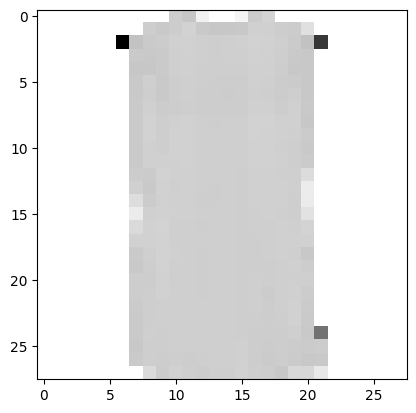

predict = 0. T-shirt_top
correct
0
1/1 [==============================] - 0s 20ms/step
[[2.6705047e-01 7.4653151e-08 1.2280847e-02 8.8411225e-03 4.3466012e-03
  7.1952083e-05 9.4921932e-02 6.0710859e-01 1.7814760e-03 3.5969254e-03]]


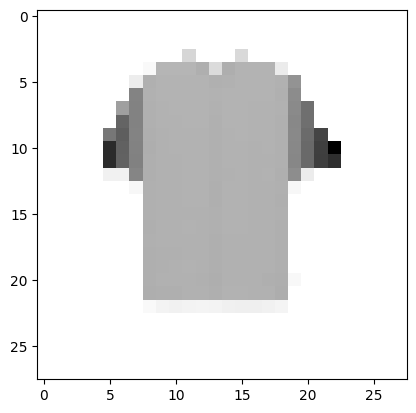

predict = 7. sneaker
wrong
1
1/1 [==============================] - 0s 56ms/step
[[1.11848905e-07 9.99999881e-01 2.01099337e-12 1.01732700e-09
  2.09965400e-13 2.14556173e-14 2.55605781e-09 1.42751813e-16
  2.25824418e-13 3.45473399e-16]]


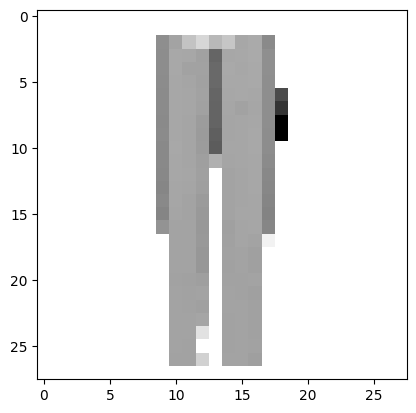

predict = 1. trouser
correct
1
1/1 [==============================] - 0s 21ms/step
[[2.8127599e-06 9.8215860e-01 5.9274938e-05 1.7486025e-02 1.6968354e-09
  2.4393503e-05 1.6624105e-07 2.3955997e-07 9.2410461e-05 1.7604169e-04]]


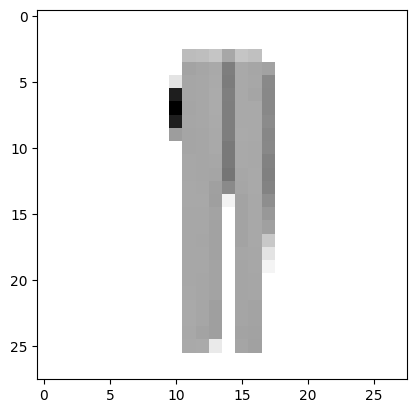

predict = 1. trouser
correct
1
1/1 [==============================] - 0s 20ms/step
[[2.4760452e-10 9.9999988e-01 2.6363872e-12 9.8935502e-08 7.0000590e-12
  4.1413665e-12 9.5599528e-09 8.2544420e-16 8.6499791e-14 5.6072239e-12]]


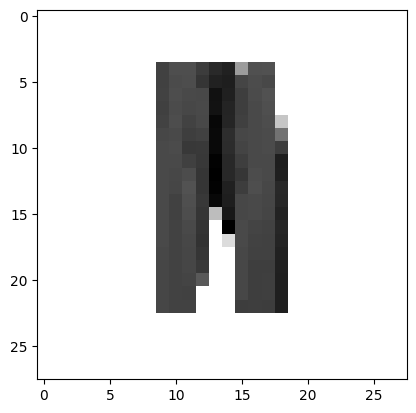

predict = 1. trouser
correct
1
1/1 [==============================] - 0s 21ms/step
[[6.6008162e-08 9.9999988e-01 4.3056166e-12 4.9979363e-09 1.1750830e-15
  4.2307322e-15 4.3596224e-11 1.5250947e-18 5.1937380e-14 7.0726796e-19]]


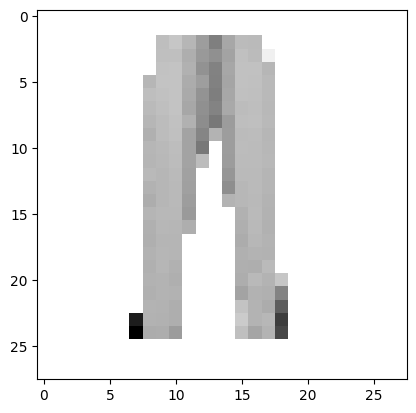

predict = 1. trouser
correct
1
1/1 [==============================] - 0s 21ms/step
[[8.3184306e-05 9.8056030e-01 8.3694613e-05 1.9200332e-02 3.7310848e-08
  1.5289547e-08 7.0718961e-05 4.4185926e-09 1.6675802e-06 5.6359784e-08]]


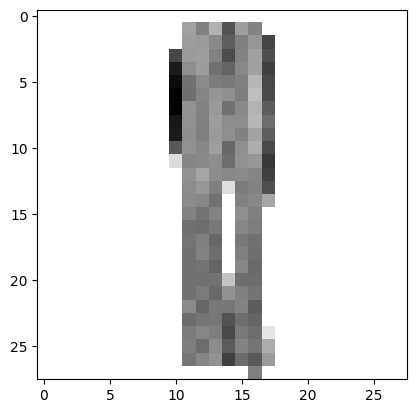

predict = 1. trouser
correct
1
1/1 [==============================] - 0s 20ms/step
[[1.3041534e-12 1.0000000e+00 4.1811284e-13 4.3831352e-11 1.2054404e-13
  2.5237985e-13 8.0060492e-13 1.5379309e-17 2.1944315e-15 2.5436922e-15]]


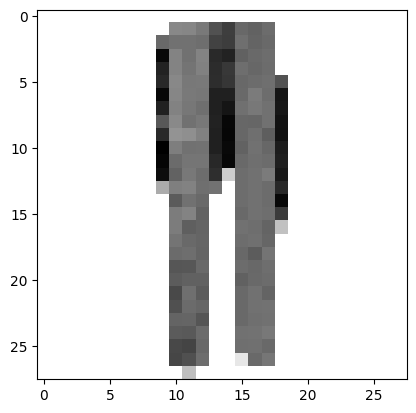

predict = 1. trouser
correct
1
1/1 [==============================] - 0s 23ms/step
[[4.4849671e-10 1.0000000e+00 4.7819228e-14 2.8628100e-11 3.7282699e-12
  7.7187670e-09 3.3857969e-11 1.1792868e-14 1.9512145e-10 1.7007541e-13]]


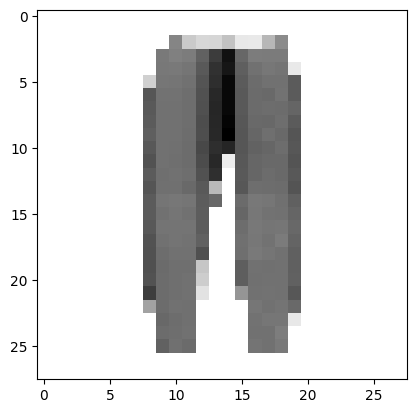

predict = 1. trouser
correct
1
1/1 [==============================] - 0s 21ms/step
[[3.5129799e-10 1.0000000e+00 3.6718896e-12 2.6261004e-11 5.1834017e-16
  4.9022323e-16 1.7953636e-10 1.3095441e-17 3.4661247e-17 3.1800171e-16]]


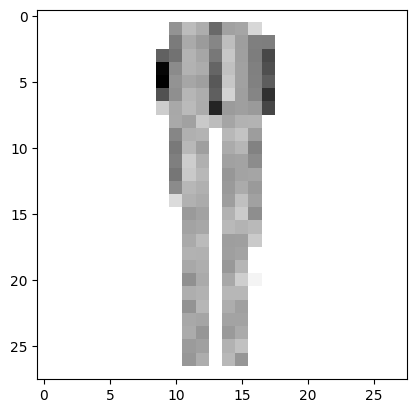

predict = 1. trouser
correct
1
1/1 [==============================] - 0s 21ms/step
[[1.4381396e-14 1.0000000e+00 4.0298694e-15 1.5957675e-13 5.4825825e-15
  2.9391859e-15 1.9584427e-15 1.4584005e-19 2.9687994e-15 8.0148598e-18]]


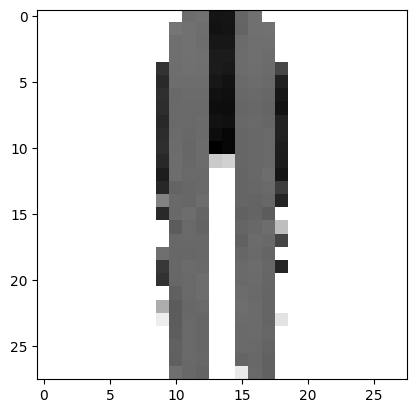

predict = 1. trouser
correct
1
1/1 [==============================] - 0s 20ms/step
[[2.7688479e-08 9.9999714e-01 1.5848781e-11 1.4993012e-07 1.0871392e-09
  1.2661451e-06 2.0873818e-09 7.4736300e-10 3.0449023e-08 1.4049918e-06]]


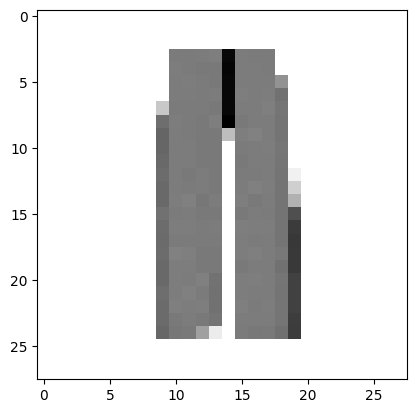

predict = 1. trouser
correct
2
1/1 [==============================] - 0s 20ms/step
[[4.4257995e-03 1.3507062e-02 1.3364686e-01 1.1510426e-03 4.4146893e-03
  6.0068746e-04 2.2526117e-01 3.7460353e-03 6.0902411e-01 4.2225551e-03]]


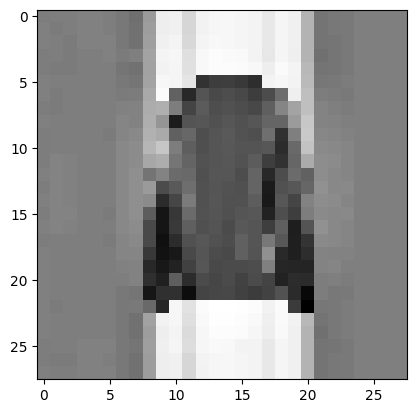

predict = 8. bag
wrong
2
1/1 [==============================] - 0s 21ms/step
[[6.5692875e-05 3.3844555e-10 9.4901365e-01 9.6224845e-08 2.8319700e-02
  2.3666262e-11 2.2600837e-02 2.6325506e-10 8.7268273e-09 3.1053954e-10]]


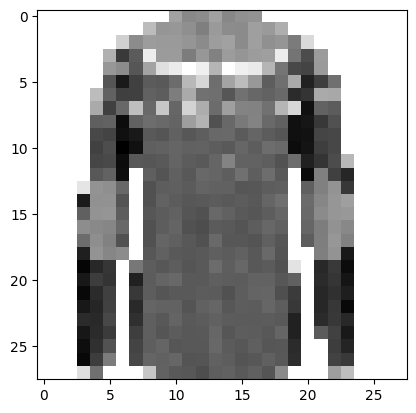

predict = 2. pullover
correct
2
1/1 [==============================] - 0s 22ms/step
[[2.9622790e-01 2.1882700e-08 7.8678206e-02 9.3675493e-07 2.7478212e-03
  3.0254937e-12 6.2234515e-01 8.3413366e-11 5.6684341e-11 2.3776347e-11]]


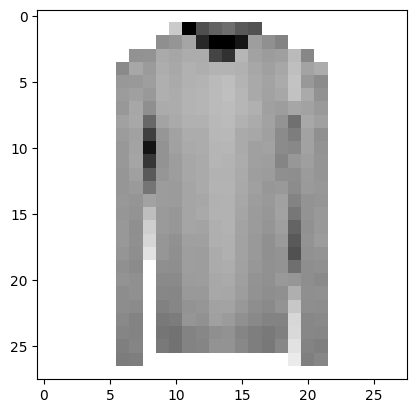

predict = 6. shirt
wrong
2
1/1 [==============================] - 0s 22ms/step
[[4.04117491e-05 3.33750506e-07 3.58644378e-04 1.01318825e-07
  9.00278687e-01 4.04205522e-08 9.87949744e-02 2.90462850e-07
  5.26392891e-04 1.61158951e-07]]


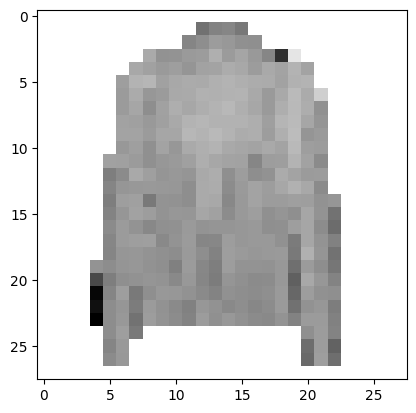

predict = 4. coat
wrong
2
1/1 [==============================] - 0s 22ms/step
[[3.3125165e-04 4.4581710e-04 2.5171189e-02 1.1506357e-05 9.6304816e-01
  1.9340883e-05 6.6917199e-03 2.3372739e-05 4.2130030e-03 4.4600823e-05]]


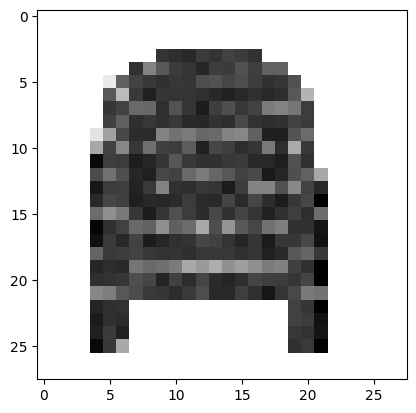

predict = 4. coat
wrong
2
1/1 [==============================] - 0s 21ms/step
[[6.0141290e-05 1.0345045e-05 5.0523475e-02 1.3616239e-03 9.3241990e-01
  4.8249873e-05 1.5380154e-02 1.0184626e-04 8.6380998e-05 7.8581852e-06]]


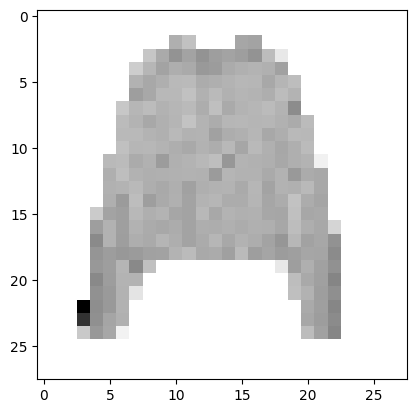

predict = 4. coat
wrong
2
1/1 [==============================] - 0s 22ms/step
[[7.0817037e-03 7.8650288e-07 4.9116588e-01 2.0093196e-04 2.9753281e-02
  1.4744167e-07 4.7146684e-01 1.7779763e-06 3.2763209e-04 9.3887854e-07]]


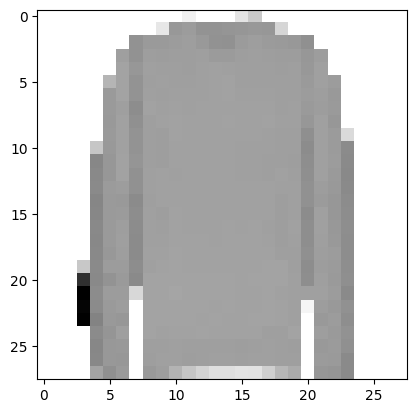

predict = 2. pullover
correct
2
1/1 [==============================] - 0s 21ms/step
[[3.0463277e-06 4.7767510e-09 8.7132053e-03 9.7530717e-01 1.5488023e-02
  1.3221185e-06 4.8685036e-04 1.7872136e-07 1.9733888e-07 4.5191246e-08]]


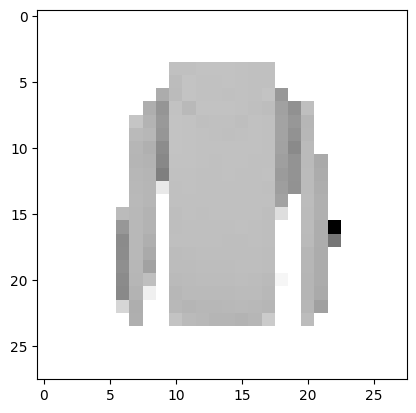

predict = 3. dress
wrong
2
1/1 [==============================] - 0s 21ms/step
[[2.1155523e-02 5.5381651e-08 1.3469317e-05 5.1811188e-05 2.2541390e-06
  3.0855535e-04 9.5081851e-03 6.9703523e-04 9.6825320e-01 9.8991704e-06]]


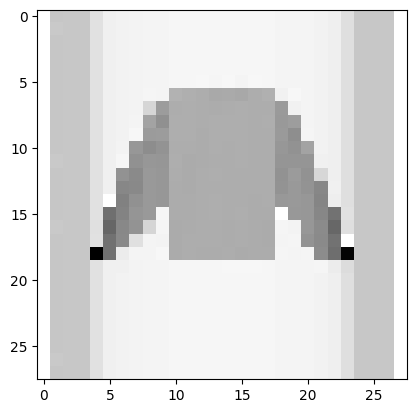

predict = 8. bag
wrong
2
1/1 [==============================] - 0s 22ms/step
[[1.19888775e-01 8.89562216e-05 3.63724102e-05 2.70243845e-06
  6.67500449e-03 3.31590010e-04 9.03027318e-03 8.45259365e-06
  8.63931775e-01 6.14876490e-06]]


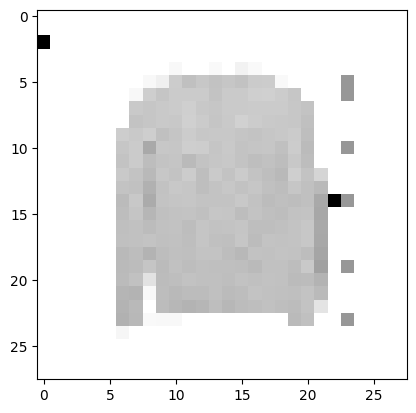

predict = 8. bag
wrong
3
1/1 [==============================] - 0s 20ms/step
[[5.4987108e-06 5.6545934e-05 2.5375307e-08 9.9991345e-01 2.9896938e-10
  7.8255382e-13 2.4377738e-05 6.3400374e-12 2.8920106e-11 6.2283858e-09]]


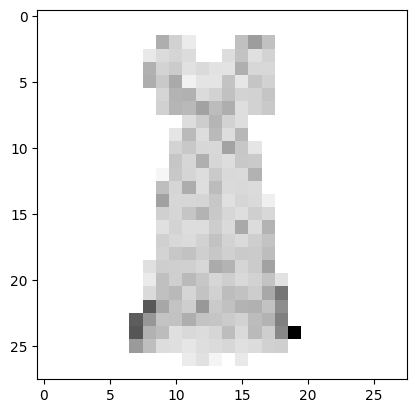

predict = 3. dress
correct
3
1/1 [==============================] - 0s 24ms/step
[[7.2265334e-06 1.2409975e-12 3.7205476e-09 9.9999261e-01 1.9891223e-10
  8.1008173e-15 1.4366427e-07 3.0165960e-13 1.5464117e-13 1.8476769e-13]]


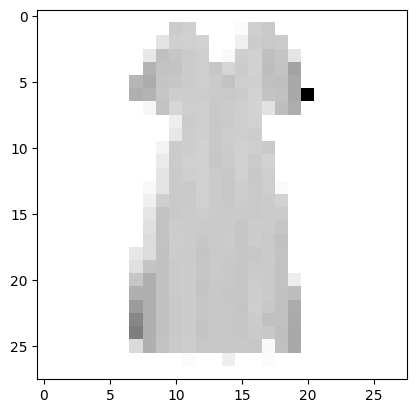

predict = 3. dress
correct
3
1/1 [==============================] - 0s 21ms/step
[[4.65279618e-06 2.25790282e-04 1.23068675e-08 9.99757469e-01
  2.43192400e-08 1.96133665e-10 2.72622469e-06 6.90458393e-08
  4.88617115e-06 4.32327670e-06]]


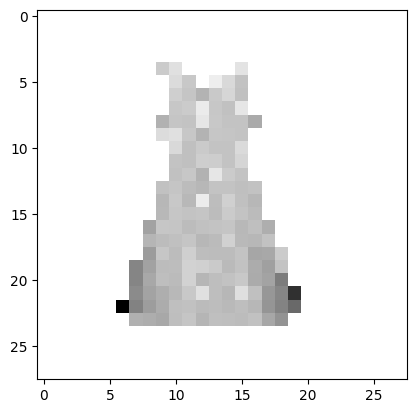

predict = 3. dress
correct
3
1/1 [==============================] - 0s 20ms/step
[[1.3798203e-07 1.2468764e-09 8.2357943e-08 9.9999821e-01 1.7434885e-10
  2.0618064e-13 1.5605655e-06 3.2445260e-12 1.4284609e-12 4.2042522e-11]]


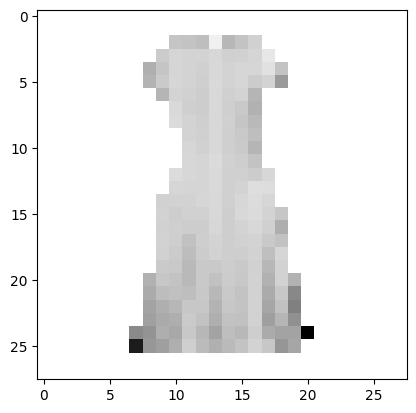

predict = 3. dress
correct
3
1/1 [==============================] - 0s 22ms/step
[[3.03108208e-02 3.25105153e-04 5.30564459e-03 6.76702289e-03
  5.43374158e-02 1.09612280e-04 7.38677382e-01 5.38653985e-04
  1.63518086e-01 1.10241395e-04]]


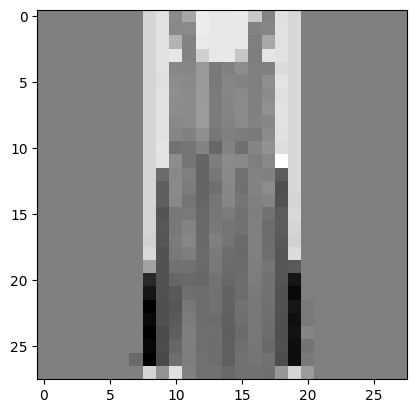

predict = 6. shirt
wrong
3
1/1 [==============================] - 0s 19ms/step
[[8.7375833e-05 7.0682763e-05 1.5706230e-06 9.9982953e-01 9.5398196e-09
  2.4674509e-12 1.0206374e-05 1.0540952e-10 6.1547377e-07 9.9454323e-10]]


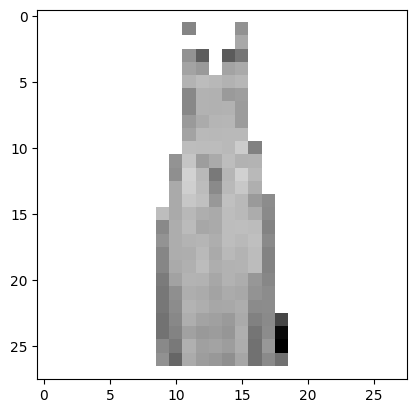

predict = 3. dress
correct
3
1/1 [==============================] - 0s 22ms/step
[[6.5304603e-06 7.2413338e-15 3.4188830e-10 9.9999273e-01 1.5403332e-09
  1.0452719e-16 6.8761523e-07 1.6128301e-13 1.2437264e-10 2.3870893e-13]]


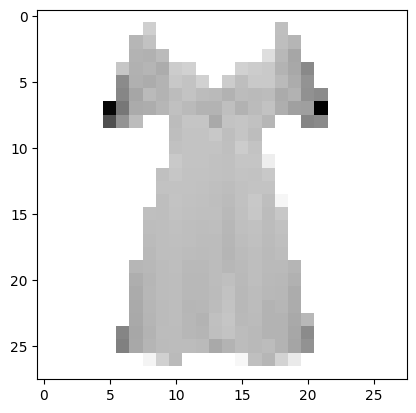

predict = 3. dress
correct
3
1/1 [==============================] - 0s 21ms/step
[[1.7635221e-05 2.0526777e-06 2.1616563e-07 9.9997663e-01 3.0120870e-09
  1.9585076e-09 3.5035371e-06 1.7683452e-09 3.6916128e-09 4.6105722e-08]]


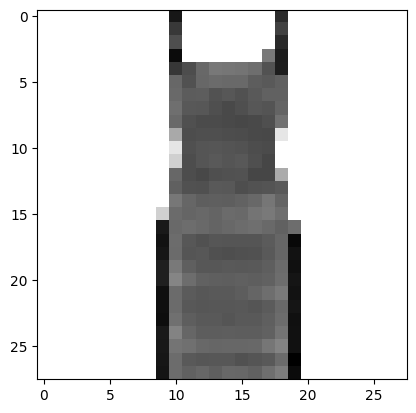

predict = 3. dress
correct
3
1/1 [==============================] - 0s 25ms/step
[[2.96215941e-08 4.69703053e-04 1.41200844e-11 3.54705065e-01
  8.91556112e-07 9.93219018e-02 8.80309017e-07 7.76903778e-02
  4.67781574e-01 2.95342252e-05]]


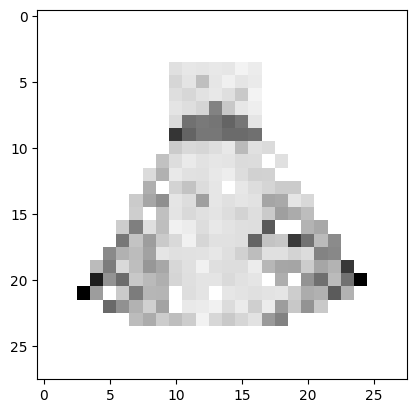

predict = 8. bag
wrong
3
1/1 [==============================] - 0s 28ms/step
[[1.3143017e-06 7.8489973e-07 6.1338682e-07 9.9999499e-01 3.2194144e-08
  4.3148218e-11 2.1063238e-06 1.9898426e-08 4.9438009e-10 1.3042882e-07]]


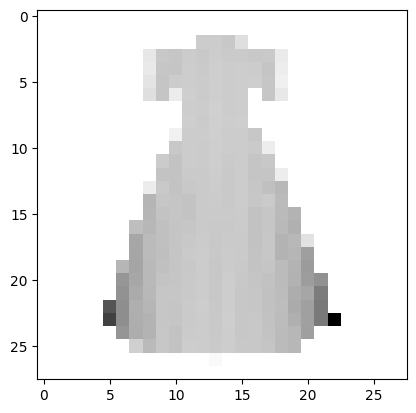

predict = 3. dress
correct
4
1/1 [==============================] - 0s 22ms/step
[[1.4216521e-06 8.5328846e-09 1.2676004e-01 1.3960495e-04 8.7278783e-01
  3.3980063e-10 3.0218347e-04 9.0085274e-07 7.9168185e-06 1.2421701e-07]]


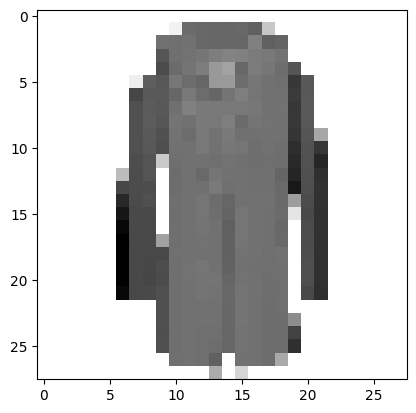

predict = 4. coat
correct
4
1/1 [==============================] - 0s 22ms/step
[[1.3124984e-03 2.4716970e-08 9.9182618e-01 1.5444160e-05 5.5267601e-03
  2.2308679e-08 1.3189622e-03 6.7718531e-08 3.4528576e-08 1.0382616e-08]]


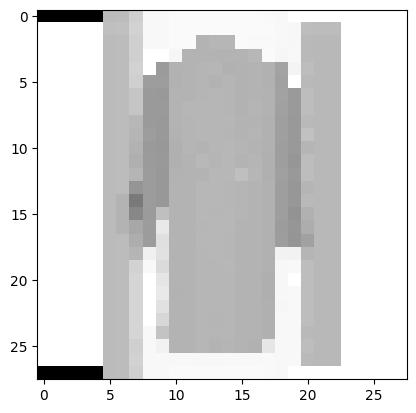

predict = 2. pullover
wrong
4
1/1 [==============================] - 0s 21ms/step
[[3.8121557e-03 1.5455317e-06 1.5963627e-03 9.4233010e-06 9.4475394e-01
  1.4228292e-04 4.8738062e-02 8.8720815e-04 5.7442288e-05 1.6537186e-06]]


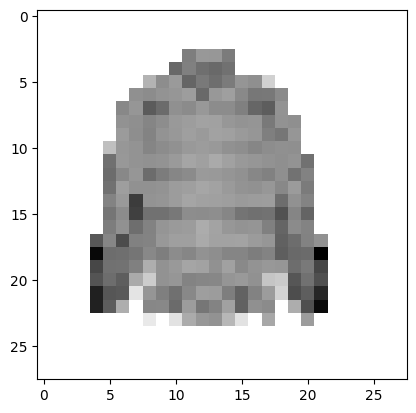

predict = 4. coat
correct
4
1/1 [==============================] - 0s 21ms/step
[[1.3563292e-09 2.2634952e-10 1.8324562e-04 1.0205872e-07 9.9981290e-01
  5.6145219e-12 3.8266953e-06 2.7210528e-10 5.1814369e-11 1.7457175e-10]]


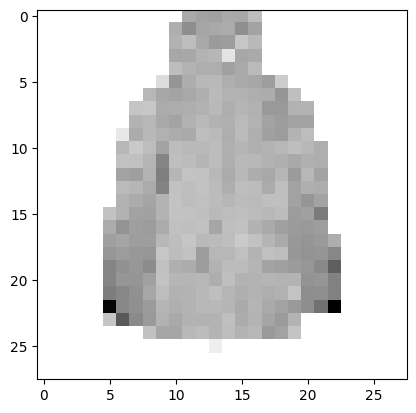

predict = 4. coat
correct
4
1/1 [==============================] - 0s 21ms/step
[[2.5565516e-08 1.3478627e-13 3.1237956e-05 5.0837370e-03 9.9485576e-01
  7.3392389e-14 2.9135977e-05 1.0498293e-08 7.7951841e-09 3.3502662e-11]]


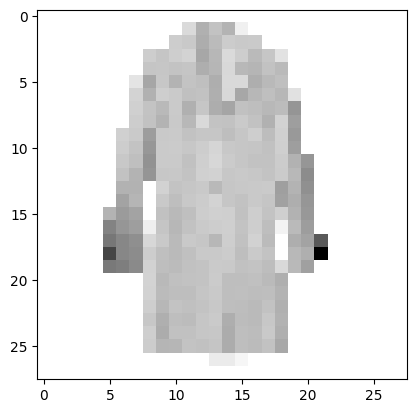

predict = 4. coat
correct
4
1/1 [==============================] - 0s 21ms/step
[[1.1416792e-01 3.6398433e-02 3.4337656e-05 8.2443434e-01 7.2770678e-03
  1.0480717e-02 6.4779404e-03 1.2188416e-04 5.8965530e-04 1.7749464e-05]]


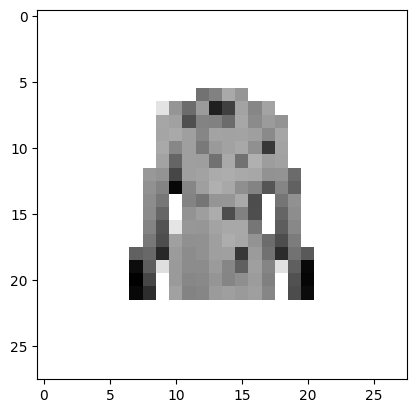

predict = 3. dress
wrong
4
1/1 [==============================] - 0s 22ms/step
[[2.8116618e-05 1.2637808e-03 7.9319230e-05 1.7486633e-01 8.2353908e-01
  1.7602723e-08 2.1993673e-04 1.6216823e-08 3.4646007e-06 4.2808654e-09]]


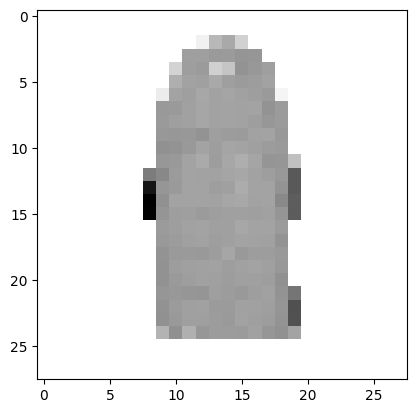

predict = 4. coat
correct
4
1/1 [==============================] - 0s 22ms/step
[[3.78651964e-03 1.16116972e-07 3.46398763e-02 1.82888117e-02
  8.11107934e-01 6.84878216e-07 1.31996945e-01 1.19833385e-04
  5.79575317e-05 1.34119250e-06]]


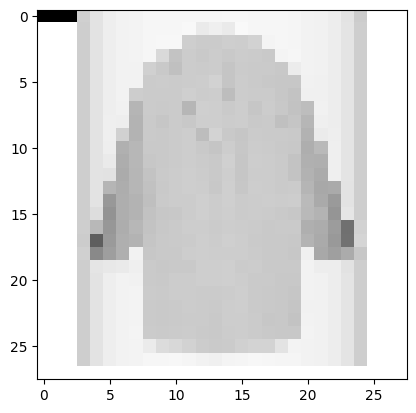

predict = 4. coat
correct
4
1/1 [==============================] - 0s 22ms/step
[[1.2925314e-05 2.0734749e-06 1.9950259e-03 2.3909336e-06 9.9778229e-01
  9.8314229e-07 1.8747388e-04 1.0780683e-05 3.0083895e-06 3.1018531e-06]]


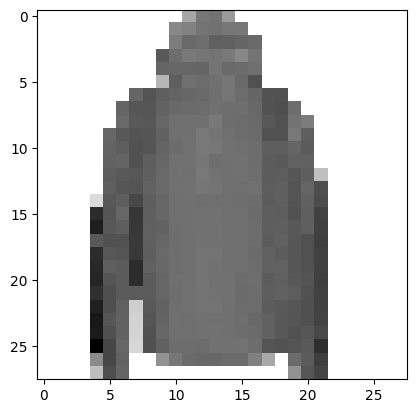

predict = 4. coat
correct
4
1/1 [==============================] - 0s 21ms/step
[[2.2136106e-05 3.5676153e-06 4.8930406e-07 9.3239349e-01 6.3854948e-02
  4.2071230e-10 3.7254125e-03 1.0864452e-09 5.8023732e-09 1.2702332e-10]]


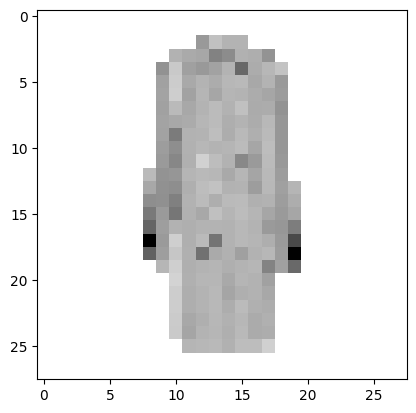

predict = 3. dress
wrong
5
1/1 [==============================] - 0s 21ms/step
[[6.8799239e-10 8.0324298e-12 2.3463056e-10 3.4733000e-18 7.9338042e-17
  7.9626986e-04 1.0584761e-08 2.8125025e-04 9.9892199e-01 5.0698412e-07]]


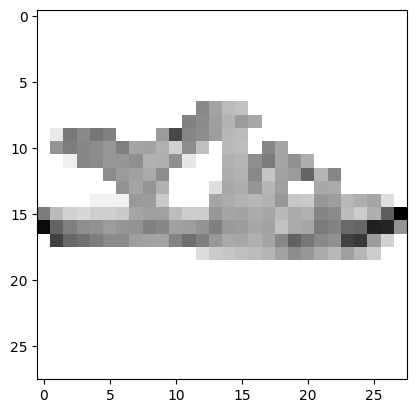

predict = 8. bag
wrong
5
1/1 [==============================] - 0s 22ms/step
[[1.4524912e-10 7.6200271e-13 2.3460395e-10 6.2159796e-12 7.0732245e-14
  2.8885620e-07 6.7640658e-09 9.9929261e-01 1.5610171e-07 7.0692215e-04]]


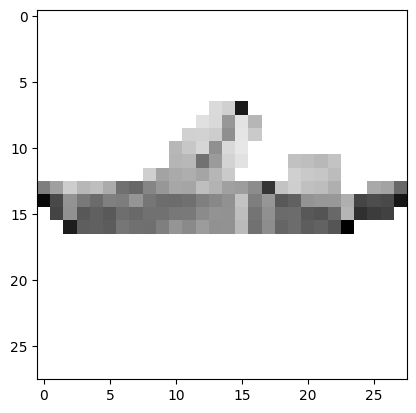

predict = 7. sneaker
wrong
5
1/1 [==============================] - 0s 21ms/step
[[3.1295947e-06 8.7244127e-12 9.7098882e-06 1.8547167e-12 1.8588267e-10
  4.7606468e-01 4.6775713e-06 4.6261394e-01 6.1281804e-02 2.2118315e-05]]


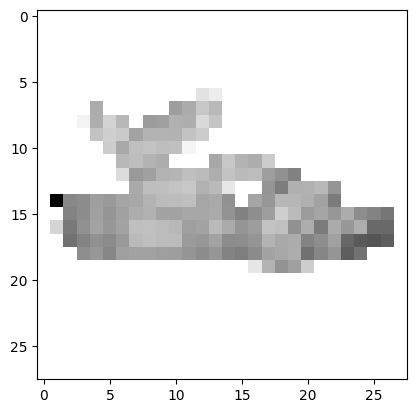

predict = 5. sandal
correct
5
1/1 [==============================] - 0s 21ms/step
[[3.5595042e-09 1.3668163e-11 1.1968696e-06 1.7228042e-13 1.0647759e-15
  2.8931312e-03 6.5025713e-05 9.7167766e-01 2.5359925e-02 3.1326524e-06]]


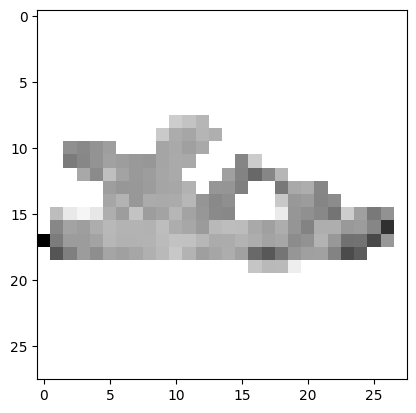

predict = 7. sneaker
wrong
5
1/1 [==============================] - 0s 20ms/step
[[1.0371501e-14 2.4671901e-15 1.0727564e-17 5.6559839e-18 3.9209623e-22
  1.0000000e+00 1.0787587e-12 6.8997315e-11 5.3328581e-11 3.9344350e-13]]


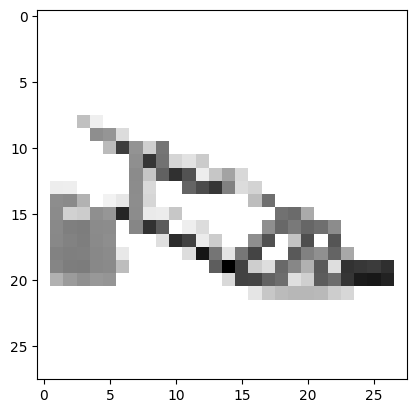

predict = 5. sandal
correct
5
1/1 [==============================] - 0s 20ms/step
[[4.0927775e-14 6.9806851e-12 4.6282715e-13 7.1147463e-11 3.3531431e-18
  9.9999976e-01 3.8714865e-13 5.4986238e-08 4.9454109e-13 1.9084635e-07]]


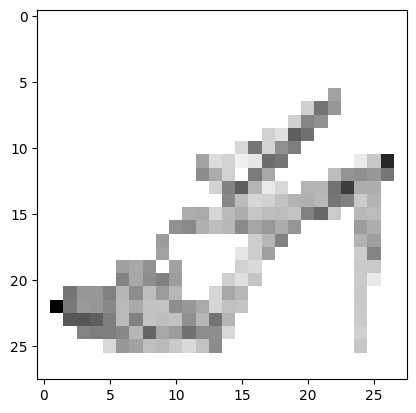

predict = 5. sandal
correct
5
1/1 [==============================] - 0s 21ms/step
[[2.0426825e-07 7.1390810e-10 1.0754535e-07 1.4440428e-11 3.5934551e-21
  9.9999964e-01 6.0170202e-10 3.6830889e-09 3.4106981e-11 1.0259434e-09]]


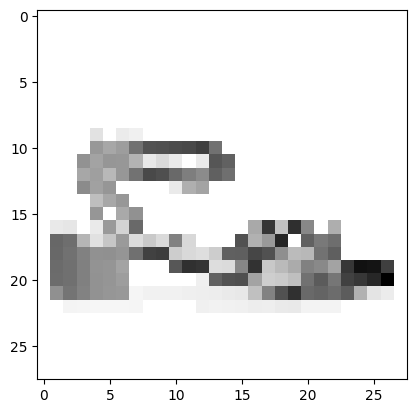

predict = 5. sandal
correct
5
1/1 [==============================] - 0s 22ms/step
[[3.5504974e-02 1.6286892e-06 2.5384934e-03 5.3131544e-08 6.1566816e-08
  2.4609579e-04 3.3788430e-04 9.6067208e-01 3.9797998e-04 3.0084670e-04]]


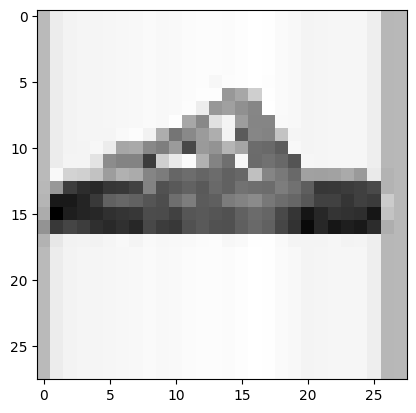

predict = 7. sneaker
wrong
5
1/1 [==============================] - 0s 20ms/step
[[1.7033432e-04 9.8832627e-04 1.1169542e-02 6.7361805e-09 2.1122387e-10
  1.4678367e-05 9.4390708e-01 2.3069972e-05 4.3726936e-02 6.2275873e-08]]


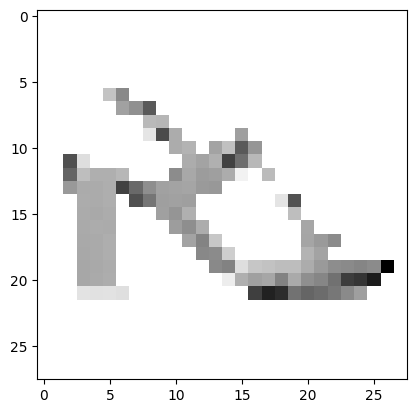

predict = 6. shirt
wrong
5
1/1 [==============================] - 0s 24ms/step
[[5.7680032e-04 1.0235583e-09 7.1372272e-04 2.1558327e-13 1.9445177e-10
  6.7931128e-01 3.9993152e-05 2.1229114e-04 3.1914496e-01 9.6989515e-07]]


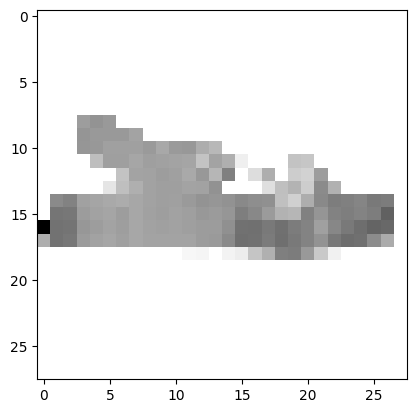

predict = 5. sandal
correct
6
1/1 [==============================] - 0s 21ms/step
[[8.1269136e-05 1.5314826e-06 9.7467083e-01 9.6789910e-04 3.1928701e-06
  9.2148366e-06 2.3929715e-02 2.7938143e-04 5.5048575e-05 1.9354916e-06]]


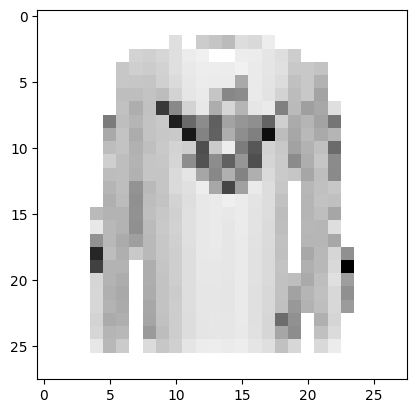

predict = 2. pullover
wrong
6
1/1 [==============================] - 0s 20ms/step
[[8.4364915e-04 2.1557906e-04 3.6591798e-01 8.5717831e-03 5.6600404e-01
  1.2224865e-05 5.6693394e-02 4.5988600e-05 1.6534658e-03 4.1865751e-05]]


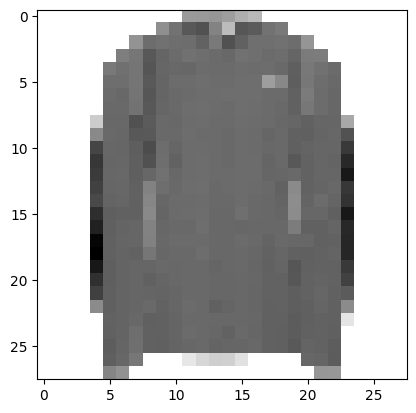

predict = 4. coat
wrong
6
1/1 [==============================] - 0s 21ms/step
[[6.0631341e-04 7.4678688e-08 8.3860421e-01 1.2757447e-01 3.1825695e-03
  1.0815431e-09 3.0027634e-02 5.0734965e-08 4.6975724e-06 7.1672166e-09]]


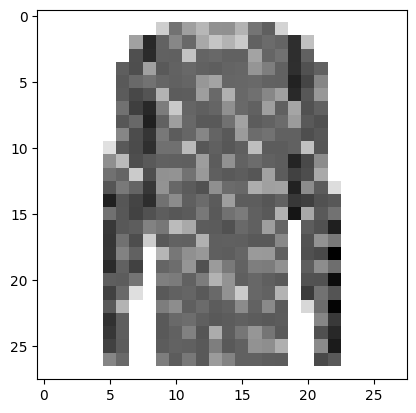

predict = 2. pullover
wrong
6
1/1 [==============================] - 0s 23ms/step
[[1.7526250e-05 5.2363093e-11 1.1700129e-04 2.2304561e-03 9.9339396e-01
  4.1185606e-09 4.2326152e-03 1.9340463e-08 8.3926589e-06 4.9131366e-09]]


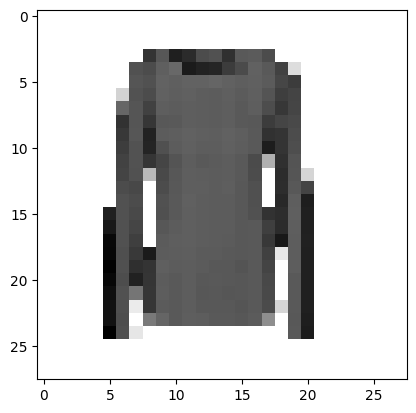

predict = 4. coat
wrong
6
1/1 [==============================] - 0s 20ms/step
[[2.1257612e-04 2.7600893e-06 1.6896768e-01 4.1141943e-03 7.0883548e-01
  6.5932213e-06 1.1763692e-01 1.4762082e-05 2.0244517e-04 6.5786498e-06]]


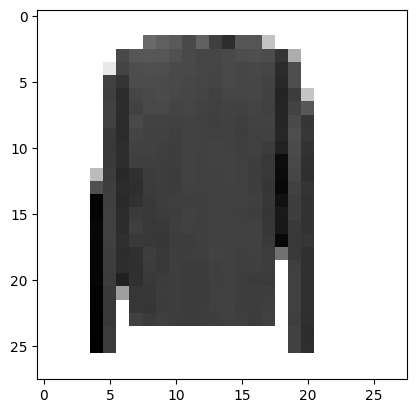

predict = 4. coat
wrong
6
1/1 [==============================] - 0s 21ms/step
[[6.4220699e-06 5.1309686e-11 9.9998510e-01 2.8627460e-07 1.3334663e-06
  2.0511057e-14 6.8879103e-06 7.9670437e-12 1.2307280e-11 7.5465101e-13]]


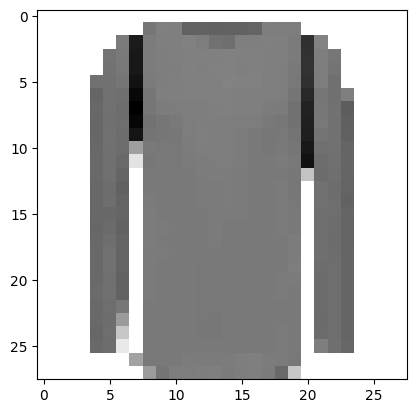

predict = 2. pullover
wrong
6
1/1 [==============================] - 0s 21ms/step
[[5.3596200e-04 4.0500713e-06 9.0279598e-03 7.5241720e-04 1.9192906e-01
  1.8037478e-03 7.9508770e-01 2.0915977e-05 8.1893633e-04 1.9140025e-05]]


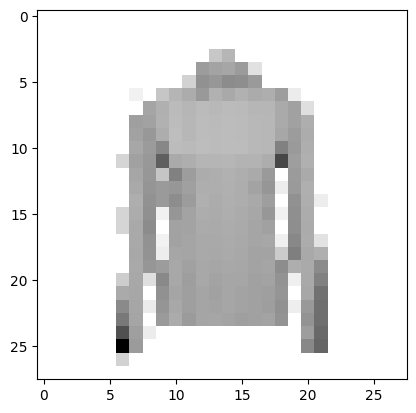

predict = 6. shirt
correct
6
1/1 [==============================] - 0s 20ms/step
[[2.6903868e-05 1.2605224e-09 9.9989283e-01 2.1965220e-06 5.5216689e-05
  1.0768219e-12 2.2834041e-05 1.2060213e-10 3.6327652e-09 3.6174806e-11]]


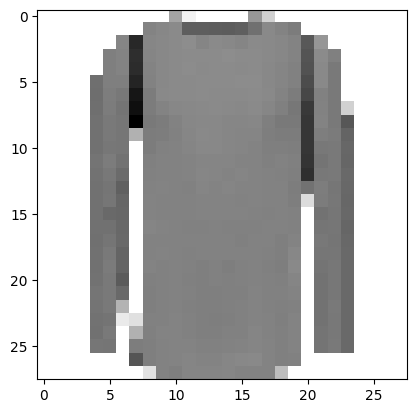

predict = 2. pullover
wrong
6
1/1 [==============================] - 0s 21ms/step
[[1.0192563e-03 1.6938058e-13 8.2758015e-06 1.8971188e-06 2.6011307e-02
  1.8708327e-16 9.7295928e-01 3.6340456e-13 8.5410170e-18 2.3694254e-15]]


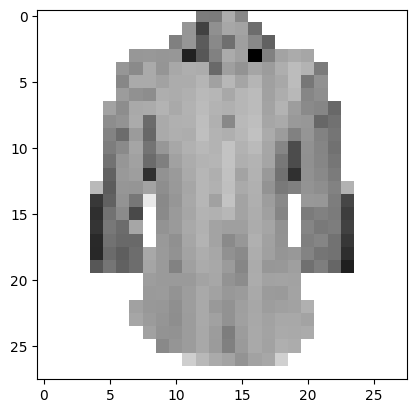

predict = 6. shirt
correct
6
1/1 [==============================] - 0s 20ms/step
[[6.8698771e-04 4.8297211e-06 3.0770794e-01 1.8444797e-07 3.6659932e-01
  9.7094537e-09 3.2499164e-01 6.4971546e-06 5.7970448e-07 2.0529662e-06]]


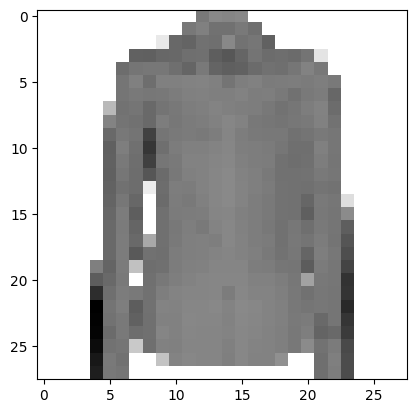

predict = 4. coat
wrong
7
1/1 [==============================] - 0s 20ms/step
[[1.6243187e-03 1.0160023e-09 2.9538803e-08 2.1926987e-15 1.7384211e-13
  9.7866231e-01 1.0100812e-07 3.8001972e-06 1.9709544e-02 6.0932209e-10]]


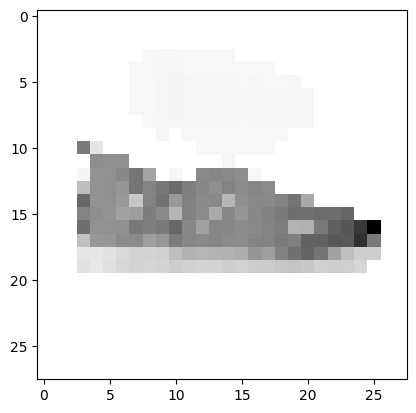

predict = 5. sandal
wrong
7
1/1 [==============================] - 0s 22ms/step
[[2.29247454e-11 6.04837903e-13 1.30658635e-11 1.17878297e-14
  4.53978692e-19 1.52043219e-06 1.25173027e-12 9.99893069e-01
  6.04356565e-11 1.05423489e-04]]


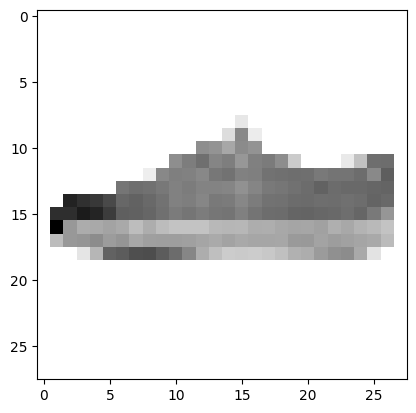

predict = 7. sneaker
correct
7
1/1 [==============================] - 0s 22ms/step
[[4.3122919e-09 4.0087295e-11 2.3513842e-11 9.1560230e-14 8.6215712e-18
  6.4916781e-04 1.9167548e-11 9.9803990e-01 5.0714132e-08 1.3109387e-03]]


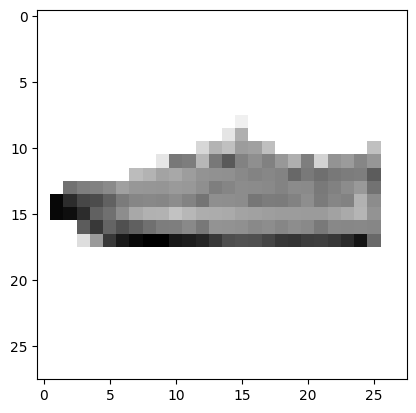

predict = 7. sneaker
correct
7
1/1 [==============================] - 0s 19ms/step
[[9.10556526e-12 2.84223301e-13 1.28130145e-11 2.31240027e-12
  3.02631028e-16 7.21114520e-06 2.28722735e-11 9.99770224e-01
  7.75016762e-09 2.22505099e-04]]


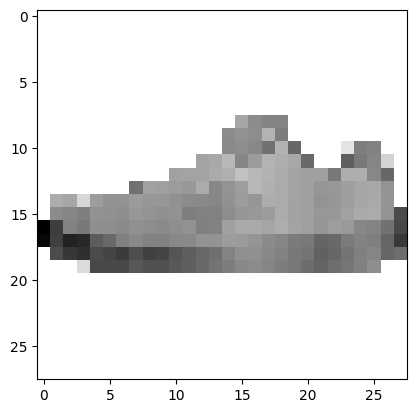

predict = 7. sneaker
correct
7
1/1 [==============================] - 0s 22ms/step
[[2.0626462e-10 1.3158989e-12 4.1839887e-10 4.8063577e-16 3.0790331e-16
  9.9999762e-01 1.6705594e-11 2.2574525e-06 9.1908681e-10 1.2492144e-07]]


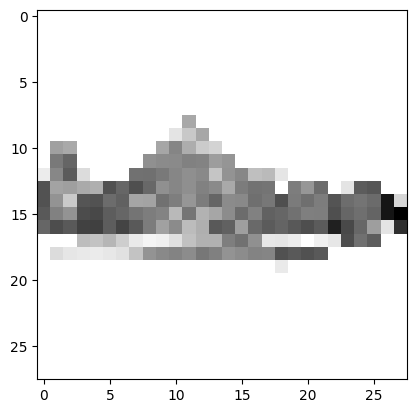

predict = 5. sandal
wrong
7
1/1 [==============================] - 0s 21ms/step
[[2.7728815e-13 5.1962780e-13 3.6286370e-14 3.1224707e-18 4.0149005e-19
  1.0000000e+00 1.7292159e-12 1.0102447e-08 2.0008197e-09 6.7178849e-12]]


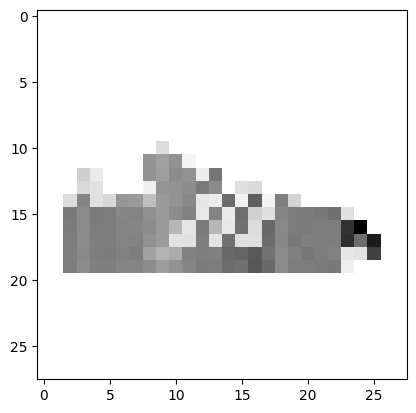

predict = 5. sandal
wrong
7
1/1 [==============================] - 0s 20ms/step
[[2.6690563e-07 1.0078226e-08 2.6900386e-09 5.0194372e-05 1.1885058e-06
  2.3343754e-01 1.6744283e-05 2.4440653e-05 7.6646709e-01 2.5844736e-06]]


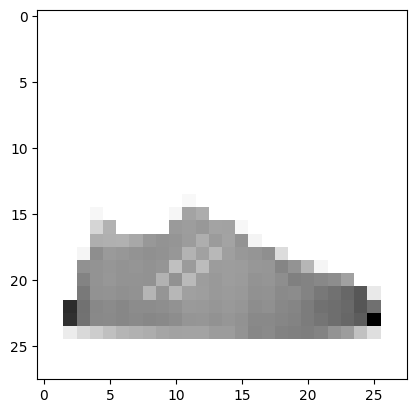

predict = 8. bag
wrong
7
1/1 [==============================] - 0s 20ms/step
[[8.8534098e-06 2.2586040e-08 7.2216317e-09 1.0344176e-06 2.4067101e-10
  2.3331277e-02 3.5693683e-06 9.6897113e-01 5.5526686e-03 2.1313806e-03]]


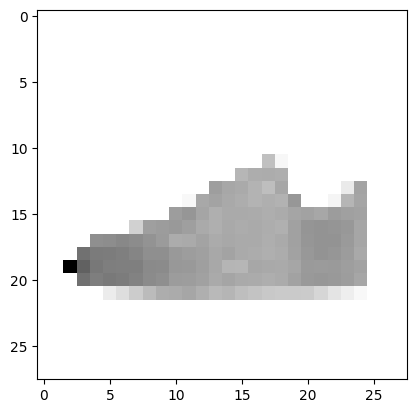

predict = 7. sneaker
correct
7
1/1 [==============================] - 0s 21ms/step
[[6.0459562e-09 6.4569856e-13 7.0118299e-12 3.2824926e-13 1.9536283e-16
  5.0825082e-07 2.2548834e-08 9.9999583e-01 2.6751293e-06 1.0151091e-06]]


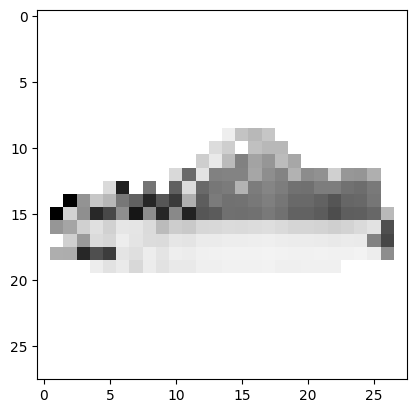

predict = 7. sneaker
correct
7
1/1 [==============================] - 0s 22ms/step
[[3.4907428e-06 8.0312027e-13 3.3466380e-10 5.7660711e-14 7.6406653e-19
  1.2795730e-01 1.7411594e-06 8.7198699e-01 4.6268142e-05 4.1440076e-06]]


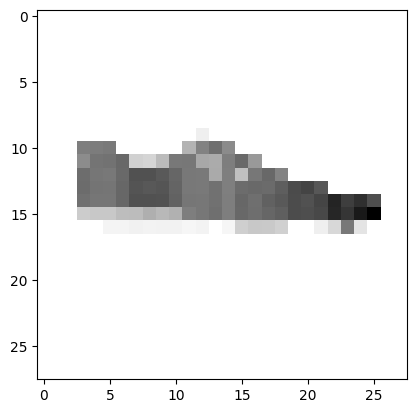

predict = 7. sneaker
correct
8
1/1 [==============================] - 0s 21ms/step
[[1.0234104e-14 6.4627099e-19 9.7927451e-17 1.0028623e-13 4.3430399e-15
  2.4984070e-11 2.4844100e-13 3.0354431e-11 1.0000000e+00 9.2746372e-15]]


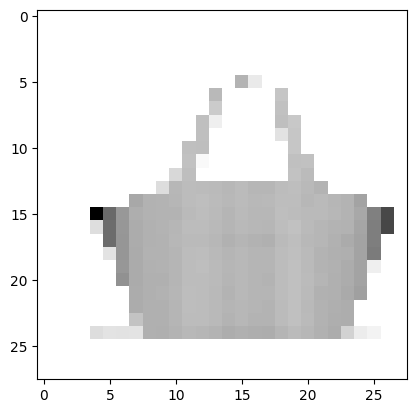

predict = 8. bag
correct
8
1/1 [==============================] - 0s 21ms/step
[[1.8586044e-05 1.5497972e-09 1.9323487e-08 1.8234694e-07 7.6839549e-11
  4.4040120e-05 5.7985721e-07 1.5432077e-07 9.9992681e-01 9.6388103e-06]]


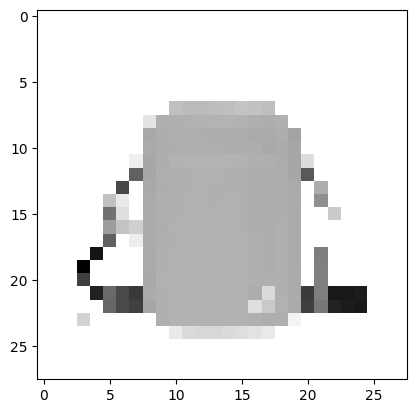

predict = 8. bag
correct
8
1/1 [==============================] - 0s 20ms/step
[[1.8706449e-12 3.1622450e-17 2.6227424e-18 4.2754645e-14 3.9337404e-15
  5.5930187e-12 1.0869432e-13 1.2017511e-13 1.0000000e+00 2.3388390e-16]]


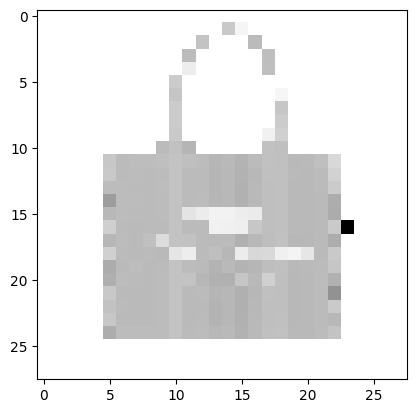

predict = 8. bag
correct
8
1/1 [==============================] - 0s 24ms/step
[[3.6782552e-05 7.1510326e-06 2.4806341e-04 9.4314944e-04 9.0753369e-05
  9.9682307e-01 6.6758401e-04 7.5202570e-06 1.6076019e-05 1.1598885e-03]]


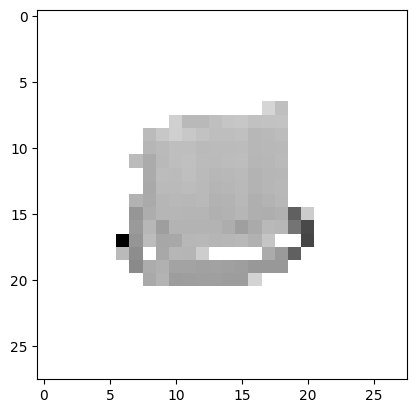

predict = 5. sandal
wrong
8
1/1 [==============================] - 0s 27ms/step
[[1.0486892e-18 2.8185868e-23 1.8434685e-22 4.2705454e-20 2.8263351e-18
  9.7407900e-21 9.9076079e-18 1.5031459e-19 1.0000000e+00 1.0426598e-22]]


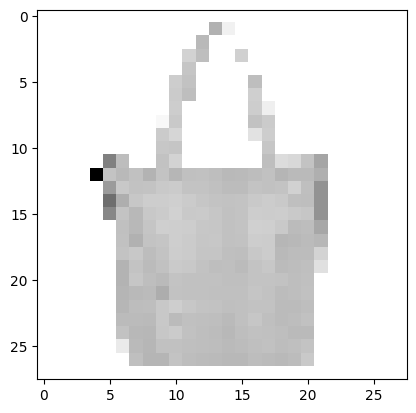

predict = 8. bag
correct
8
1/1 [==============================] - 0s 23ms/step
[[2.4503975e-14 2.4537792e-14 1.8531319e-14 1.4860670e-12 6.6865201e-14
  5.4650929e-08 3.2000764e-13 3.6983745e-12 1.0000000e+00 9.6913757e-15]]


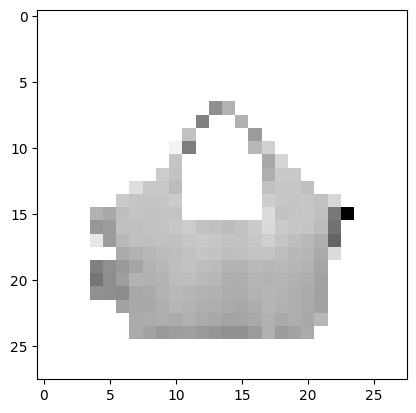

predict = 8. bag
correct
8
1/1 [==============================] - 0s 21ms/step
[[7.2733813e-10 7.2117984e-14 1.0867757e-09 1.1097804e-08 3.0229889e-06
  7.3967322e-14 5.7808597e-07 1.8089795e-10 9.9999642e-01 3.6505360e-12]]


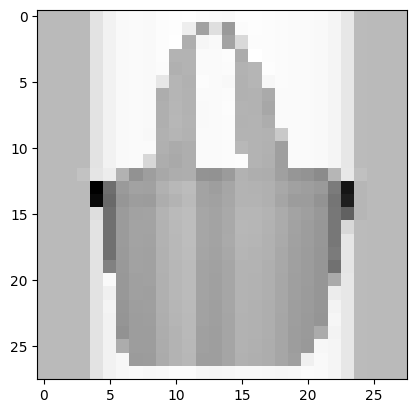

predict = 8. bag
correct
8
1/1 [==============================] - 0s 22ms/step
[[1.4247432e-13 1.1071266e-16 1.6354728e-15 9.9942087e-15 1.7120348e-13
  1.4188395e-13 2.7406235e-13 2.1507890e-15 1.0000000e+00 1.6129564e-16]]


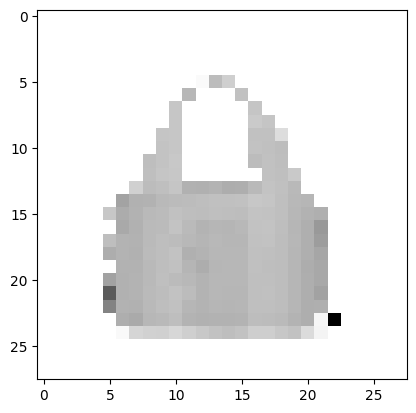

predict = 8. bag
correct
8
1/1 [==============================] - 0s 22ms/step
[[8.85598456e-06 2.32060202e-08 5.29927602e-10 7.97638122e-10
  3.38926692e-10 6.07859604e-02 3.54927153e-07 1.04814116e-10
  9.39204752e-01 1.24609517e-10]]


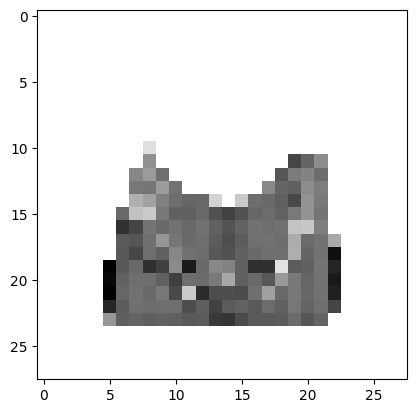

predict = 8. bag
correct
8
1/1 [==============================] - 0s 24ms/step
[[1.1460714e-01 9.2169503e-06 5.8105033e-02 2.1009748e-01 5.8050889e-01
  7.3515014e-07 3.4871414e-02 1.6048891e-03 1.6907704e-04 2.6042058e-05]]


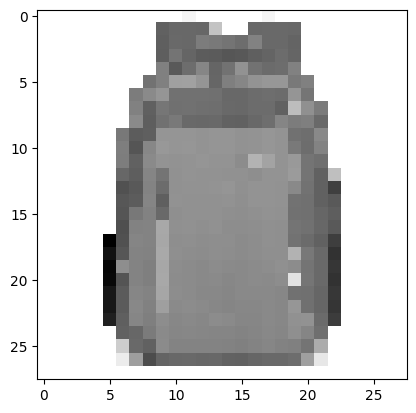

predict = 4. coat
wrong
9
1/1 [==============================] - 0s 22ms/step
[[9.2303075e-05 1.3364601e-06 9.9575740e-01 9.7367758e-10 1.3827851e-05
  3.6689762e-03 4.3071251e-04 3.8895138e-07 3.3490523e-05 1.5818046e-06]]


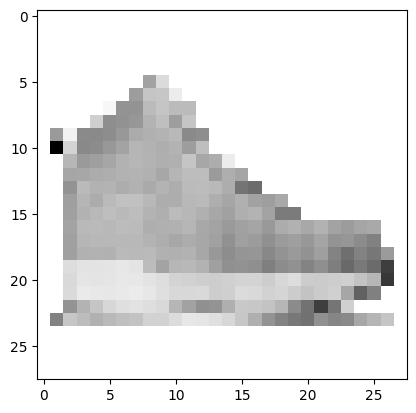

predict = 2. pullover
wrong
9
1/1 [==============================] - 0s 22ms/step
[[6.9149202e-01 2.0087084e-06 2.5725514e-01 3.0323074e-06 5.9377843e-08
  4.9666286e-02 1.1288916e-03 1.4379433e-06 4.5097779e-04 1.8785202e-07]]


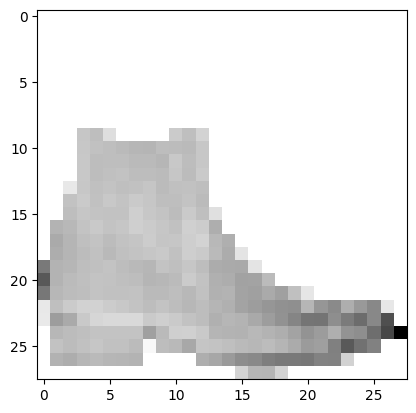

predict = 0. T-shirt_top
wrong
9
1/1 [==============================] - 0s 29ms/step
[[8.2137276e-11 2.1251989e-10 7.6064499e-10 1.3520345e-09 1.4840996e-11
  1.0125249e-05 5.7989019e-10 9.9966669e-01 4.0667206e-10 3.2319524e-04]]


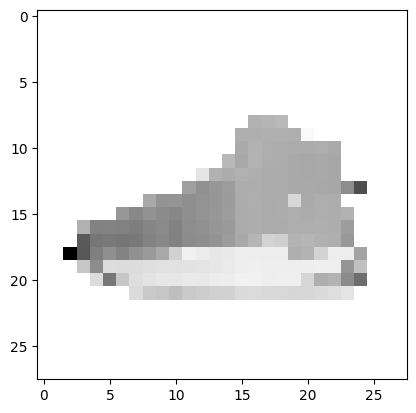

predict = 7. sneaker
wrong
9
1/1 [==============================] - 0s 25ms/step
[[3.9915558e-05 1.7371184e-04 1.3552621e-01 7.7577839e-03 3.0454175e-05
  3.0305460e-05 9.9267010e-03 2.6497932e-07 8.4650952e-01 5.1960974e-06]]


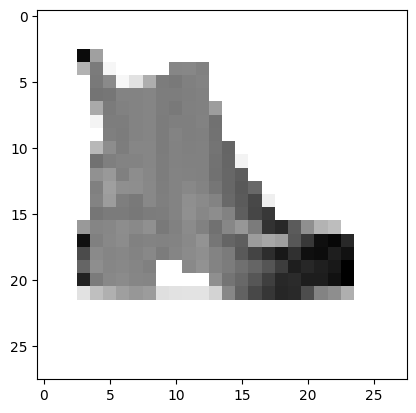

predict = 8. bag
wrong
9
1/1 [==============================] - 0s 20ms/step
[[6.8123500e-06 1.9847919e-08 1.4829077e-11 4.2572779e-10 1.9144159e-14
  2.8485703e-01 5.8362218e-08 3.5673935e-02 2.6814517e-08 6.7946219e-01]]


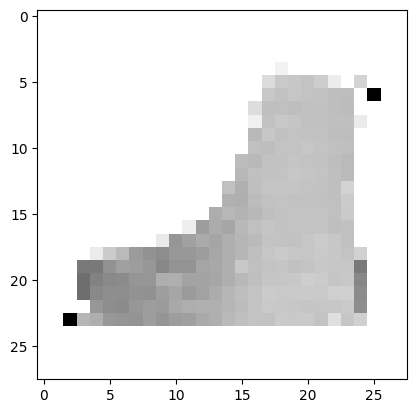

predict = 9. ankle boot
correct
9
1/1 [==============================] - 0s 23ms/step
[[1.9684243e-10 7.4654519e-12 4.6884869e-09 2.7902116e-11 3.0322969e-10
  2.5595157e-10 1.1159240e-10 3.3745944e-02 3.6572138e-11 9.6625406e-01]]


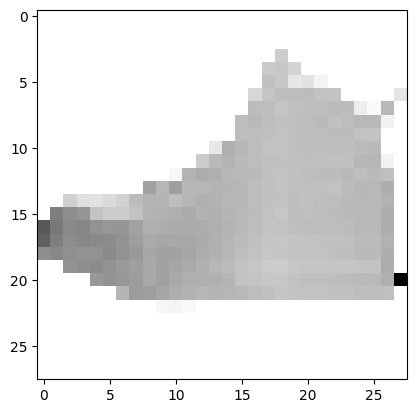

predict = 9. ankle boot
correct
9
1/1 [==============================] - 0s 21ms/step
[[2.7809056e-02 4.2168204e-02 7.8100055e-01 3.1653464e-05 9.7272471e-03
  1.1952082e-01 1.9241836e-02 1.7607821e-06 4.3093279e-04 6.8017376e-05]]


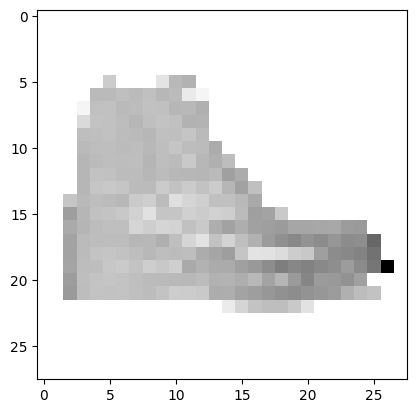

predict = 2. pullover
wrong
9
1/1 [==============================] - 0s 21ms/step
[[2.3021627e-02 2.2729646e-05 2.0960750e-02 1.8252157e-08 3.2953751e-05
  8.0988538e-01 5.6730519e-04 1.4704319e-05 1.4548500e-01 9.5939859e-06]]


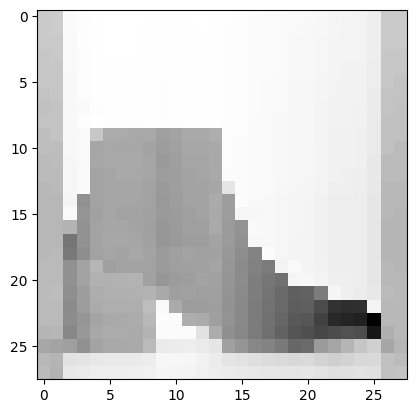

predict = 5. sandal
wrong
9
1/1 [==============================] - 0s 22ms/step
[[1.0821652e-08 5.9611379e-05 1.1902647e-10 7.3517117e-07 3.0706246e-08
  7.8837704e-03 4.7355173e-09 4.5775619e-06 1.7242396e-08 9.9205130e-01]]


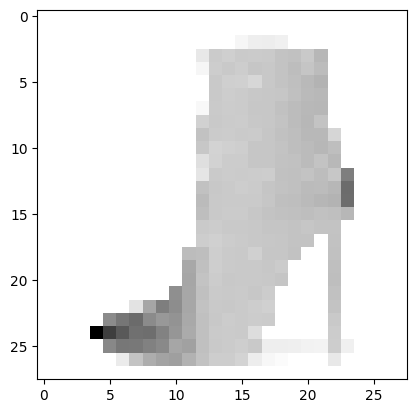

predict = 9. ankle boot
correct
9
1/1 [==============================] - 0s 20ms/step
[[1.7139764e-05 2.7053374e-01 2.1179968e-03 6.4344072e-01 9.8428631e-05
  1.1199300e-02 4.6105105e-02 1.0462245e-06 2.6413482e-02 7.2960691e-05]]


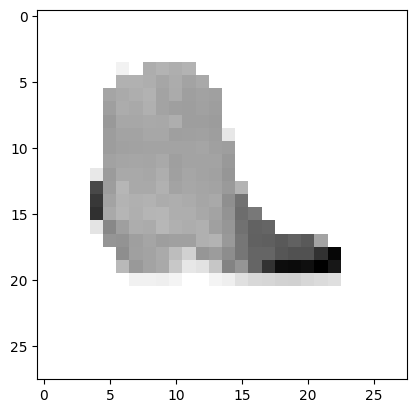

predict = 3. dress
wrong
total = 100
acc = 57.99999999999999 %


In [12]:
g=0
f=0

for x, y in zip(X, Y):
    print(y)
    x = np.expand_dims(x, axis=0)
    predictions = new_model.predict([x])
    x = np.expand_dims(x, axis=-1)
    x = x[0,:,:,0]
    print(predictions)
    plt.imshow(x, cmap=plt.cm.binary)
    plt.show()
    print("predict =", CATEGORIES[np.argmax(predictions)])
    if (y==np.argmax(predictions)):
        g = g+1
        print("correct")
    else:
        f = f+1
        print("wrong")

acc = g/(g+f)
tot = g + f
print("total =", tot)
print("acc =", acc*100,"%")


In this cell we iterate trough all the pictures and run them trough the model seperately. We also check if the guess was correct and calculated the accuracy of the model. 

## Additional Questions
* In which way could the network accuracy be improved further (only explanation, no implementation)?

the model accuracy is pretty low at 58%, this is because certain classes are very hard to distinguish. mainly coat, pullover and shirt are very similar. the accuracy could be increased by providing images with more detail or color.